Libraries

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from warnings import filterwarnings
filterwarnings(action='ignore')

Dataset

In [37]:
dataset = pd.read_csv(r'C:\Users\agnih\Desktop\ML\Iris.csv')
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [38]:
dataset.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
#Checking for the null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
#Grouping them by type of species and size of them
dataset.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

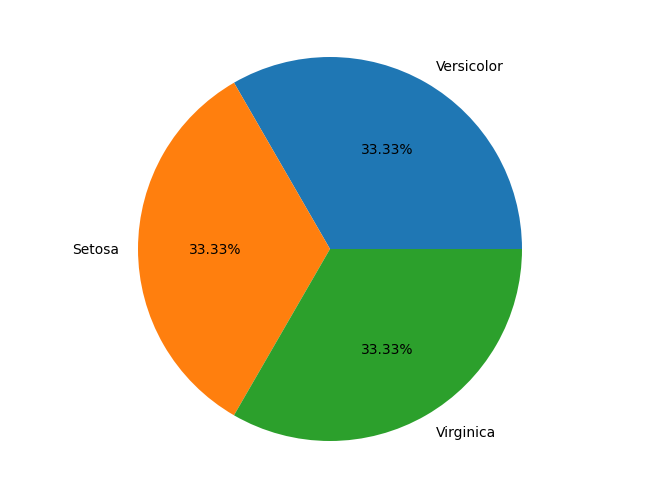

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<AxesSubplot: >

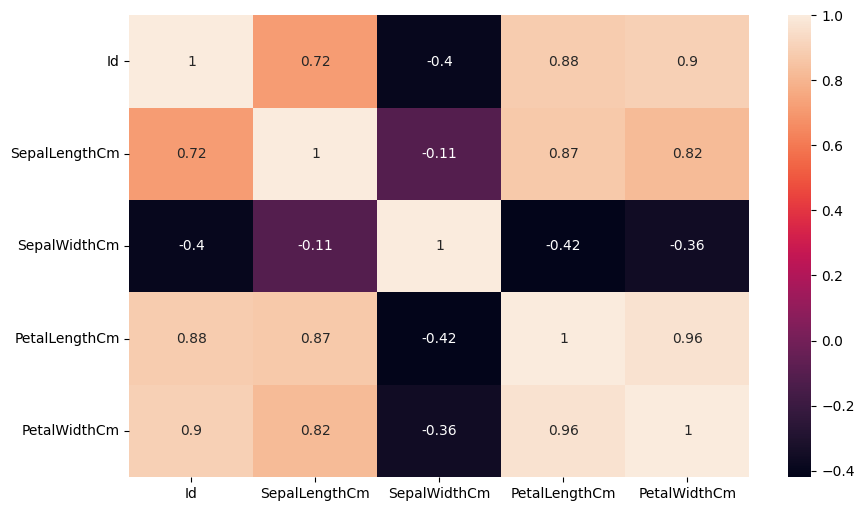

In [43]:
#Understanding the Correlation between the Variables
corr = dataset.corr(numeric_only = True)
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'Centimeters')

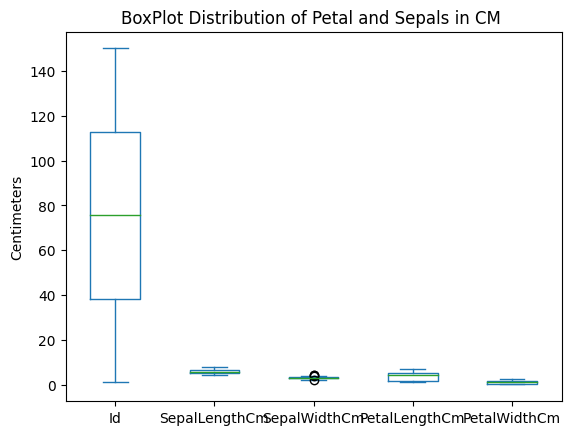

In [44]:
dataset.plot(kind='box')
plt.title('BoxPlot Distribution of Petal and Sepals in CM ')
plt.ylabel('Centimeters')

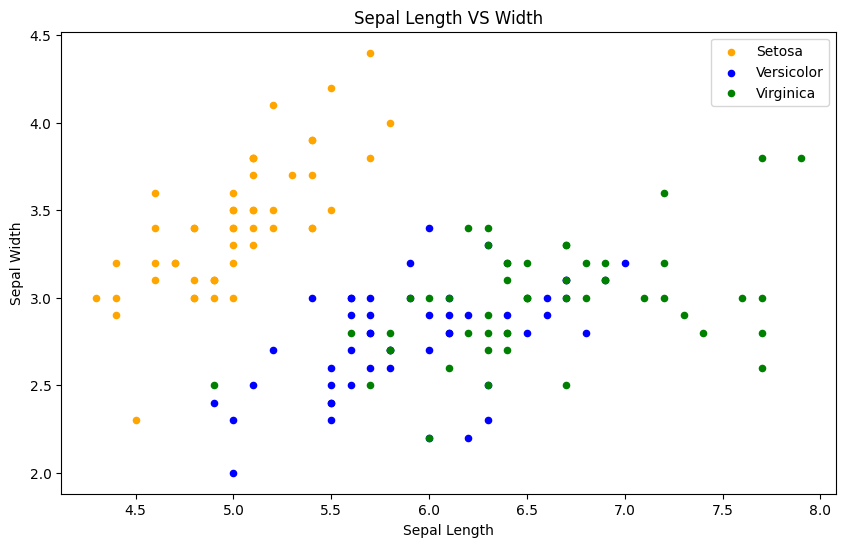

In [45]:
fig = dataset[dataset.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig)
dataset[dataset.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

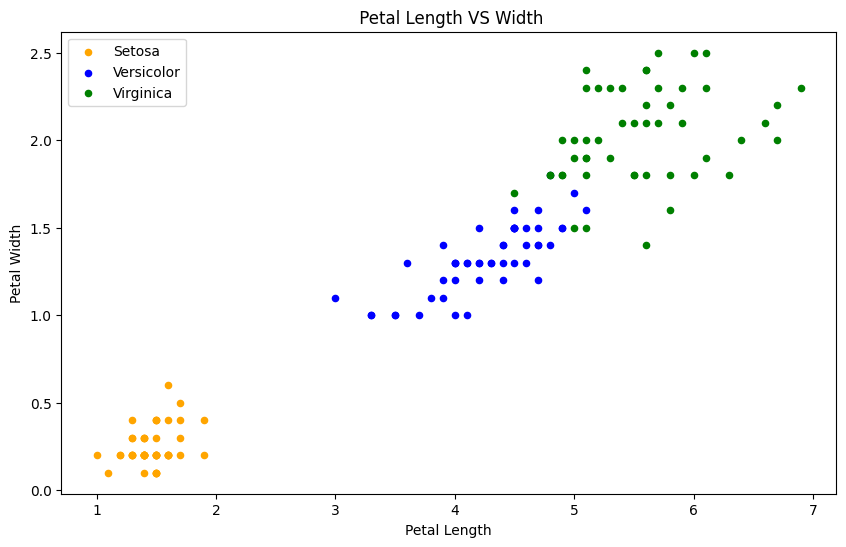

In [46]:
fig = dataset[dataset.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig)
dataset[dataset.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Splitting into Training and Test Datasets

In [47]:
X=dataset.iloc[:,:-1].values #Independent
y=dataset.iloc[:,-1].values #Dependent (Type of Specie)

Encoding the Dependent Variable 

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
print(y)
#Species are Encoded as 0,1,2 representing a type of specie 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Model Training and Evaluating

In [50]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9666666666666667


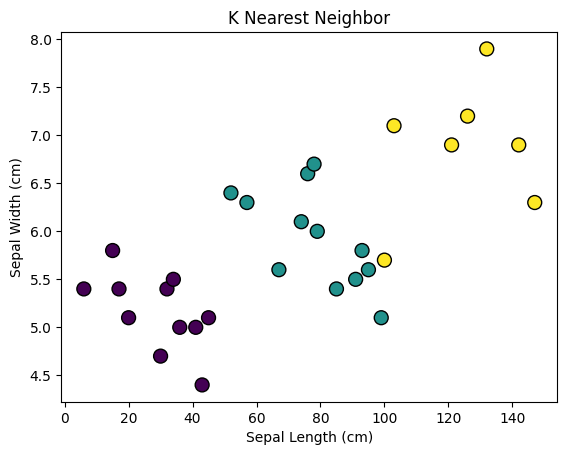

In [51]:
# K Nearest Neighbor
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=100, edgecolors='black')
plt.title("K Nearest Neighbor")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)
y_pred_log = classifier_log.predict(X_test)
print(accuracy_score(y_pred_log,y_test))

1.0


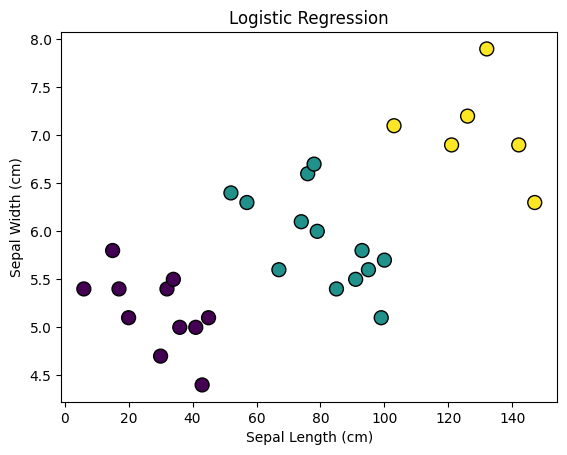

In [53]:
# Logistic Regression
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_log, marker='o', s=100, edgecolors='black')
plt.title("Logistic Regression")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [54]:
#Decision Tree Classifier
from sklearn import tree
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)
predictions=classifier_tree.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9666666666666667


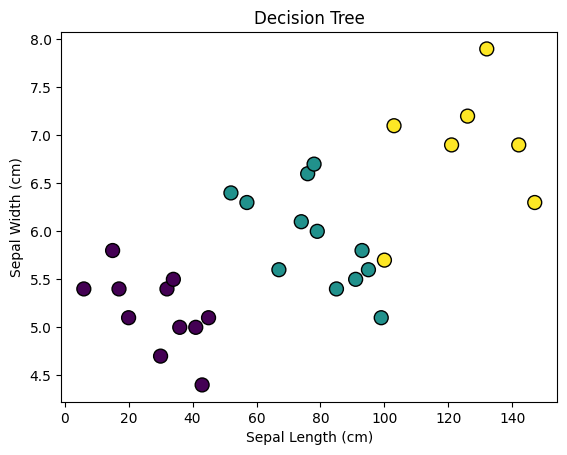

In [55]:
# Decision Tree
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='o', s=100, edgecolors='black')
plt.title("Decision Tree")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [56]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=15,random_state=1)
classifier_forest.fit(X_train,y_train)
pred_random = classifier_forest.predict(X_test)
print(accuracy_score(pred_random,y_test))

1.0


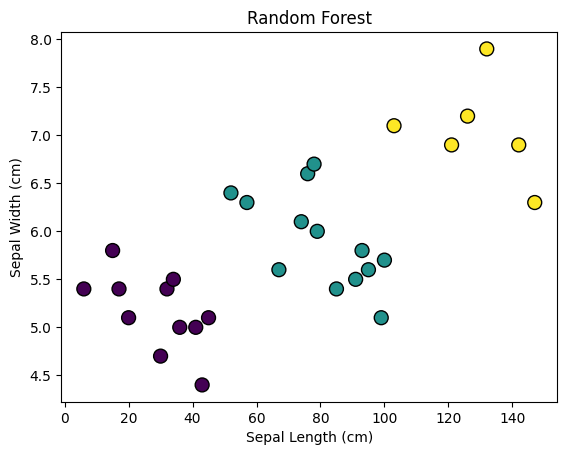

In [57]:
# Random Forest
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_random, marker='o', s=100, edgecolors='black')
plt.title("Random Forest")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

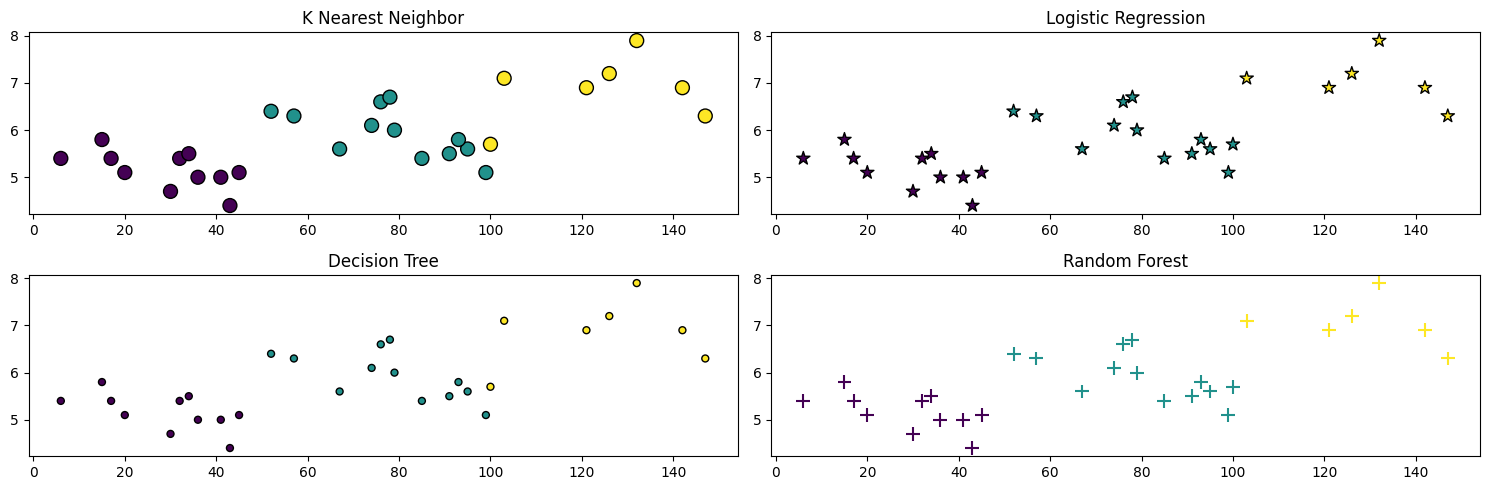

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=100, edgecolors='black')
plt.title("K Nearest Neighbor")

plt.subplot(2, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_log, marker='*', s=100, edgecolors='black')
plt.title("Logistic Regression")

plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='.', s=100, edgecolors='black')
plt.title("Decision Tree")

plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_random, marker='+', s=100, edgecolors='black')
plt.title("Random Forest")

plt.tight_layout()
plt.show()
